<a href="https://colab.research.google.com/github/Jonathann-andr/Independent-Student-Kampus-Merdeka/blob/main/LandUse_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget 

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
# UNZIP FILE ZIP KE FOLDER
!unzip "/content/drive/My Drive/UCMerced.zip" 
  

Archive:  /content/drive/My Drive/UCMerced.zip
replace UCMerced_LandUse/Images/forest/forest44.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os, re, glob, cv2, numpy as np

path = os.path.abspath('LandUse.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir(path+'drive/My Drive/UCMerced_LandUse/Images/') #list directory in Land Use Images folder
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob(path+'drive/My Drive/UCMerced_LandUse/Images/'+i+'/*.tif'):
        im = cv2.imread(pic) #open image
        im = cv2.resize(im,(70,70))
        im = np.array(im) #change into array
        count = count + 1
        X.append(im)
        y.append(label)
        if(count == 3): #SAmple
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[2097])
plt.show()

NameError: ignored

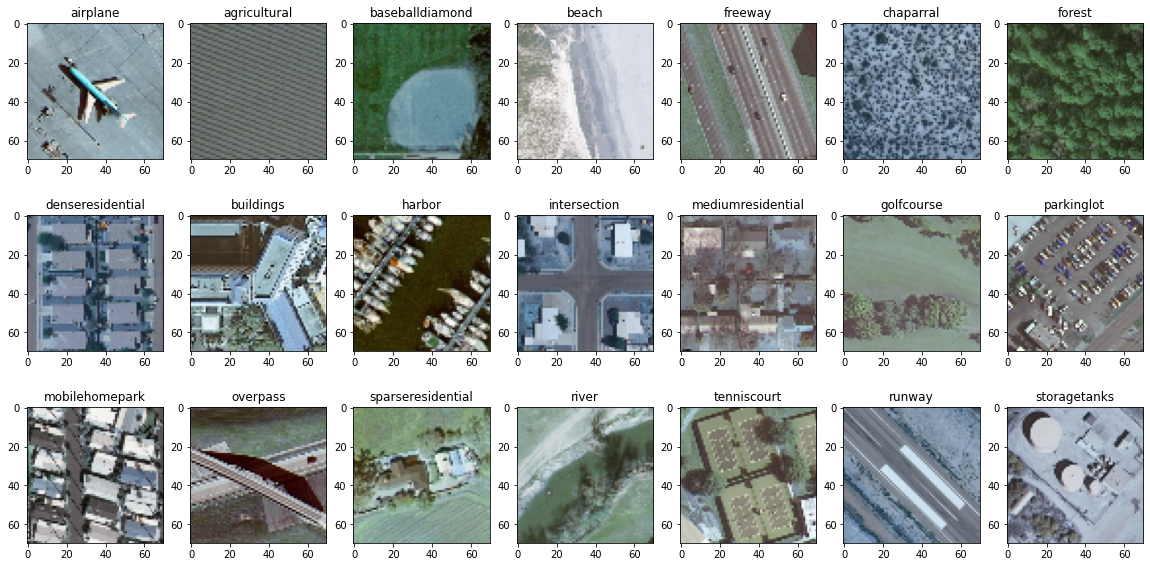

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 7, figsize=(20, 10))
cnt = 0
row = 0
col = 0
for i in im_arr:
    for key, value in i.items():
        if(cnt==7):
            row = row + 1
            col = 0
            cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(key)
        cnt = cnt + 1
        col = col + 1
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 21) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 21) #change label to binary / categorical

model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',
                 input_shape=(70,70,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (5, 5), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten. 
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(21, activation='softmax')) #softmax works

In [ ]:
from tensorflow.keras.optimizers import SGD

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [ ]:
save_model = model.save("/content/drive/My Drive/dataset/
                        UCMerced_LandUse/model_landuse.h5")

In [ ]:
def mapping(ids):
    kata = {'0':'forest','1':'runway','2':'freeway','3':'denseresidential','4':'baseballdiamond','5':'beach','6':'agricultural','7':'buildings','8':'overpass','9':'chaparral','10':'storagetanks','11':'airplane','12':'sparseresidential','13':'tenniscourt','14':'mobilehomepark','15':'golfcourse','16':'parkinglot','17':'intersection','18':'mediumresidential','19':'river','20':'harbor'}
    hasil = kata.get(ids)
    return hasil
  
img = cv2.imread("/content/drive/My Drive/dataset/UCMerced_LandUse/Images/harbor/harbor05.tif")
img = cv2.resize(img,(70,70))
imgs = np.array([img])
y_pred = model.predict(imgs)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.]], dtype=float32)